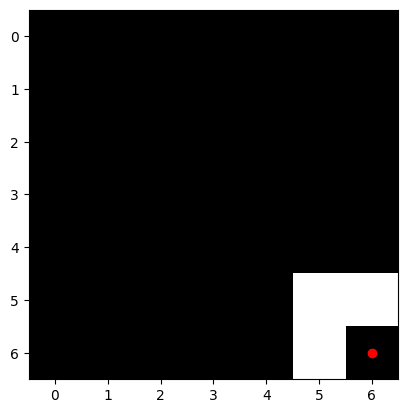

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#En un entorno se buscará que el agente rodee a una entidad que está posicionada de manera aleatoria en el mismo.

class Environment:
    def __init__(self, size):
        self.size = size
        self.entity_pos = np.random.randint(0, size, 2) #genera una posicion random para la entidad en un entorno de size

    def get_state(self, agent_pos):
        return np.append(agent_pos, self.entity_pos)
        #devuelve un array que contiene la posición del agente y la posición de la entidad, que representa el estado actual del entorno.

    def get_reward(self, agent_pos): #recompensa basada en la posicion del agente
        return int(np.all(np.abs(agent_pos - self.entity_pos) <= 1))

class Agent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros((env.size, env.size, env.size, env.size, 4))

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(self.q_table[tuple(state)])

    def update_q_table(self, state, action, reward, next_state, alpha, gamma):   #actualiza la tabla q basado en la experiencia adquirida, bellman
        old_value = self.q_table[tuple(state.tolist() + [action])]  #Valor Q actual para estado y accion
        next_max = np.max(self.q_table[tuple(next_state)]) #valor maximo de Q de la mejor accion que el agente podria tomar en el prox estado
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # valor actualizado de Q
        self.q_table[tuple(state.tolist() + [action])] = new_value #actualiza el nuevo valor calculado en la tabla q

def train_agent(agent, episodes, alpha=0.7, gamma=0.9, epsilon=0.6):
    rewards = np.zeros((agent.env.size, agent.env.size))  # Para almacenar las recompensas
    for episode in range(episodes):
        agent_pos = np.random.randint(0, agent.env.size, 2) #inicializa el agente en una posicion aleatoria
        while not agent.env.get_reward(agent_pos):
            state = agent.env.get_state(agent_pos)
           # print(state)
            action = agent.choose_action(state, epsilon)
           # print(action)
            if action == 0:   # arriba
                next_pos = agent_pos + [-1, 0]
            elif action == 1: # abajo
                next_pos = agent_pos + [1, 0]
            elif action == 2: # izquierda
                next_pos = agent_pos + [0, -1]
            else:             # derecha
                next_pos = agent_pos + [0, 1]
            next_pos = np.clip(next_pos, 0, agent.env.size - 1) #limita al agente
            reward = agent.env.get_reward(next_pos) #recompensa para la nueva posicion del agente
            next_state = agent.env.get_state(next_pos) #nuevo estado despues de la accion
            agent.update_q_table(state, action, reward, next_state, alpha, gamma) #actualizacion de la qtable con la experiencia adquirida
            agent_pos = next_pos #actualiza la posicion del agente
            if reward > 0:  # Si el agente recibe una recompensa, marcamos esa posición en la matriz
                rewards[tuple(agent_pos)] = 1
    return rewards

def plot_rewards(rewards, entity_pos):
    # Crear una figura y un eje
    fig, ax = plt.subplots()

    # Dibujar el entorno
    ax.imshow(rewards, cmap='gray')

    # Dibujar la entidad
    ax.plot(entity_pos[1], entity_pos[0], 'ro')

    # Mostrar la figura
    plt.show()

# Crear el entorno y el agente
env = Environment(size=7)
agent = Agent(env)

# Num_episodes
#rewards = train_agent(agent, episodes=400)
rewards = train_agent(agent, episodes=400)

# Graficar las recompensas
plot_rewards(rewards, env.entity_pos)

# Asignar un valor de 100 a la posición de la entidad en la matriz de recompensas
rewards[tuple(env.entity_pos)] = 100



In [43]:
# Ajustar las opciones de impresión de NumPy
np.set_printoptions(threshold=np.inf)

# Ahora, cuando imprimas la matriz, se mostrará completa
print(rewards)

[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   1.]
 [  0.   0.   0.   0.   0.   1. 100.]]
